<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
import wget

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
wget.download(url)

'm4_survey_data (1).sqlite'

Connect to the database.


In [21]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [5]:
import pandas as pd

## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


<Axes: >

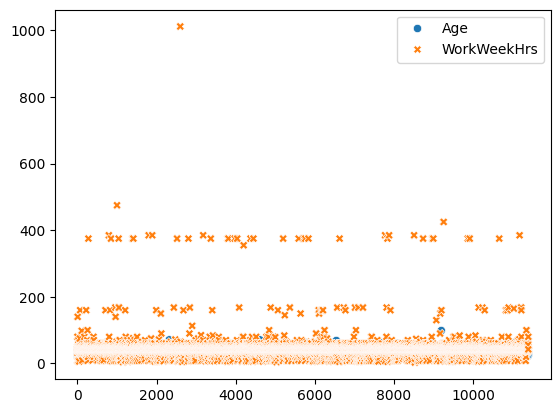

In [30]:
import seaborn as sns
sns.scatterplot(df[[ 'Age','WorkWeekHrs']])

In [28]:
QUERY = """
SELECT * FROM
master

"""
df = pd.read_sql_query(QUERY,conn)


ValueError: scatter requires an x and y column

In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


In [65]:
QUERY = """
SELECT *, count(DatabaseDesireNextYear) as Total FROM
DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear 
ORDER BY count(DatabaseDesireNextYear)
DESC limit 5
"""

df_db = pd.read_sql_query(QUERY,conn)
df_db

,Respondent,DatabaseDesireNextYear,Total
0,9,PostgreSQL,4328
1,16,MongoDB,3649
2,9,Redis,3331
3,4,MySQL,3281
4,16,Elasticsearch,2856


<Axes: ylabel='Total'>

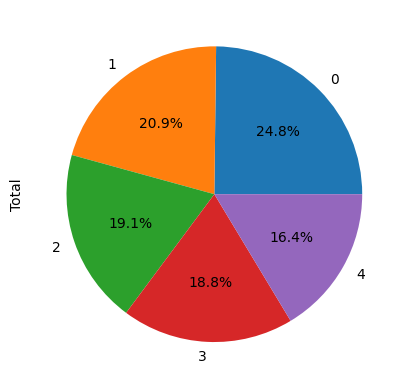

In [68]:
df_db['Total'].plot(kind='pie', xlabel='DatabaseDesireNextYear', autopct='%1.1f%%')


In [70]:
QUERY = """
SELECT *, count(LanguageDesireNextYear) as Total FROM
LanguageDesireNextYear
GROUP BY LanguageDesireNextYear 
order by count(LanguageDesireNextYear) desc 
"""

df_ln = pd.read_sql_query(QUERY, conn)
df_ln

,Respondent,LanguageDesireNextYear,Total
0,4,JavaScript,6630
1,9,HTML/CSS,5328
2,20,Python,5239
3,4,SQL,5012
4,9,TypeScript,4088
5,4,C#,3591
6,9,Bash/Shell/PowerShell,3097
7,17,Java,2953
8,23,Go,2759
9,23,Kotlin,1890


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

In [173]:
QUERY = """
select *, count(DatabaseWorkedWith) as NumTotal
from DatabaseWorkedWith
group by Respondent


"""
df_db1=pd.read_sql_query(QUERY, conn)
df_db1


,Respondent,DatabaseWorkedWith,NumTotal
0,4,MySQL,2
1,9,DynamoDB,3
2,13,Couchbase,4
3,16,MongoDB,3
4,17,MongoDB,2
...,...,...,...
10940,25136,Microsoft SQL Server,1
10941,25137,MySQL,1
10942,25138,PostgreSQL,1
10943,25141,Microsoft SQL Server,2


In [191]:

df_db1[df_db1['NumTotal']==1].groupby('DatabaseWorkedWith').count()

#result=df_db1.groupby('NumTotal')['DatabaseWorkedWith'].count().reset_index()
#result

,Respondent,NumTotal
DatabaseWorkedWith,,
Cassandra,10,10
Couchbase,8,8
DynamoDB,28,28
Elasticsearch,27,27
Firebase,90,90
MariaDB,44,44
Microsoft SQL Server,845,845
MongoDB,170,170
MySQL,474,474


In [127]:
df_db1.tail()

,Respondent,DatabaseWorkedWith
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis
31374,25142,PostgreSQL


## Demo: How to describe a table


In [9]:
tablename = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(tablename)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [10]:
# your code goes here


### Box Plots


Plot a box plot of `Age.`


In [11]:
# your code goes here



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [12]:
# your code goes here



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [13]:
# your code goes here



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [14]:
# your code goes here



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [15]:
# your code goes here



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [244]:
# your code goes here
QUERY = '''
select * from master where Age > 24 and Age <31
'''
df_master=pd.read_sql_query(QUERY,conn)
df_master.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
1,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
2,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
3,16,43,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Spain,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per month or weekly,Yes,"No, I've heard of them, but I am not part of a...","Yes, definitely",Just as welcome now as I felt last year,27.0,No,No,Too long,Easy
4,24,60,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Secondary school (e.g. American high school, G...",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",None,27.0,No,No,None,None


<Axes: xlabel='Age'>

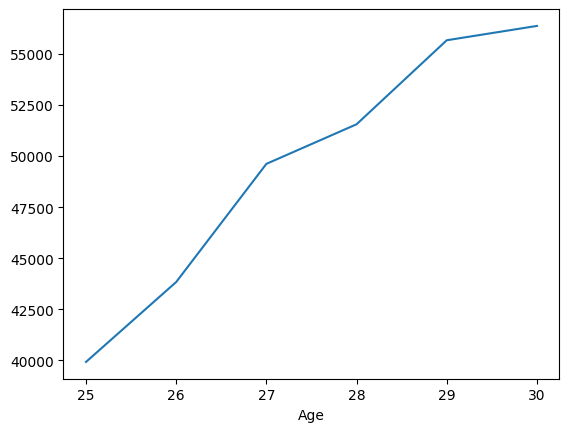

In [245]:
re = df_master.groupby('Age')['ConvertedComp'].median()
re.plot()

### Bar Chart


<Axes: ylabel='MainBranch'>

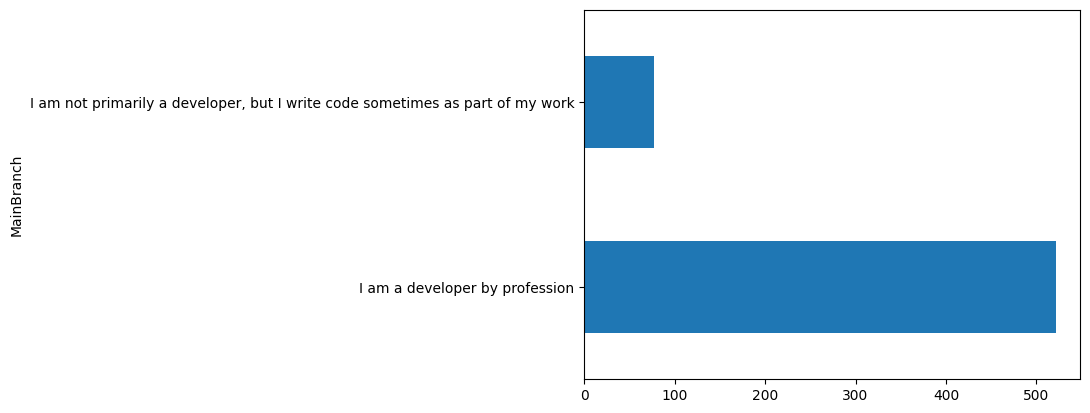

In [239]:
df_master['MainBranch'].value_counts().plot(kind='barh')

Create a horizontal bar chart using column `MainBranch.`


In [243]:
# your code goes here
QUERY = '''  
select DevType, count(DevType) from DevType
group by DevType
order by count(DevType) desc

'''
dfT = pd.read_sql_query(QUERY,conn)
dfT

,DevType,count(DevType)
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


Close the database connection.


In [246]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
